In [3]:
! pip install opendatasets --quiet

In [4]:
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/datasets/miadul/brain-tumor-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alekseimedvedev
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/miadul/brain-tumor-dataset


# Преодобработка данных


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("/content/brain-tumor-dataset/brain_tumor_dataset.csv")
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [8]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

In [9]:
target = df['Follow_Up_Required']
df=df.drop(['Follow_Up_Required'],axis=1)
df=df.drop(['Patient_ID'],axis=1)

In [10]:
target.value_counts()

,count
Follow_Up_Required,
Yes,10101
No,9899


In [11]:
classes_names=['No', 'Yes']
codes = {classes_names[i] : i for i in range(len(classes_names))}
target = target.map(codes)
target.value_counts()

,count
Follow_Up_Required,
1,10101
0,9899


In [12]:
df.isna().sum()

,0
Age,0
Gender,0
Tumor_Type,0
Tumor_Size,0
Location,0
Histology,0
Stage,0
Symptom_1,0
Symptom_2,0
Symptom_3,0


In [13]:
for col in df.columns:
  print('{} : {}'.format(col, len(df[col].unique())))

Age : 60
Gender : 2
Tumor_Type : 2
Tumor_Size : 20000
Location : 4
Histology : 4
Stage : 4
Symptom_1 : 4
Symptom_2 : 4
Symptom_3 : 4
Radiation_Treatment : 2
Surgery_Performed : 2
Chemotherapy : 2
Survival_Rate : 20000
Tumor_Growth_Rate : 20000
Family_History : 2
MRI_Result : 2


In [14]:
categ=['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History', 'MRI_Result']

In [15]:
cont = []
for feat in df.columns:
  if (feat not in categ):
    cont.append(feat)


In [16]:
categ

['Gender',
 'Tumor_Type',
 'Location',
 'Histology',
 'Stage',
 'Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Radiation_Treatment',
 'Surgery_Performed',
 'Chemotherapy',
 'Family_History',
 'MRI_Result']

In [17]:
cont

['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']

In [18]:
for name in categ:
    dummies = pd.get_dummies(df[name], prefix=name, dummy_na=True, drop_first=False)
    df=pd.concat([df,dummies],axis=1)
df=df.drop(columns=categ)
df.head()

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Female,Gender_Male,Gender_nan,Tumor_Type_Benign,Tumor_Type_Malignant,Tumor_Type_nan,...,Surgery_Performed_nan,Chemotherapy_No,Chemotherapy_Yes,Chemotherapy_nan,Family_History_No,Family_History_Yes,Family_History_nan,MRI_Result_Negative,MRI_Result_Positive,MRI_Result_nan
0,73,5.375612,51.312579,0.111876,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
1,26,4.847098,46.373273,2.165736,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
2,31,5.588391,47.072221,1.884228,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
3,29,1.436600,51.853634,1.283342,False,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
4,54,2.417506,54.708987,2.069477,True,False,False,True,False,False,...,False,False,True,False,True,False,False,False,True,False


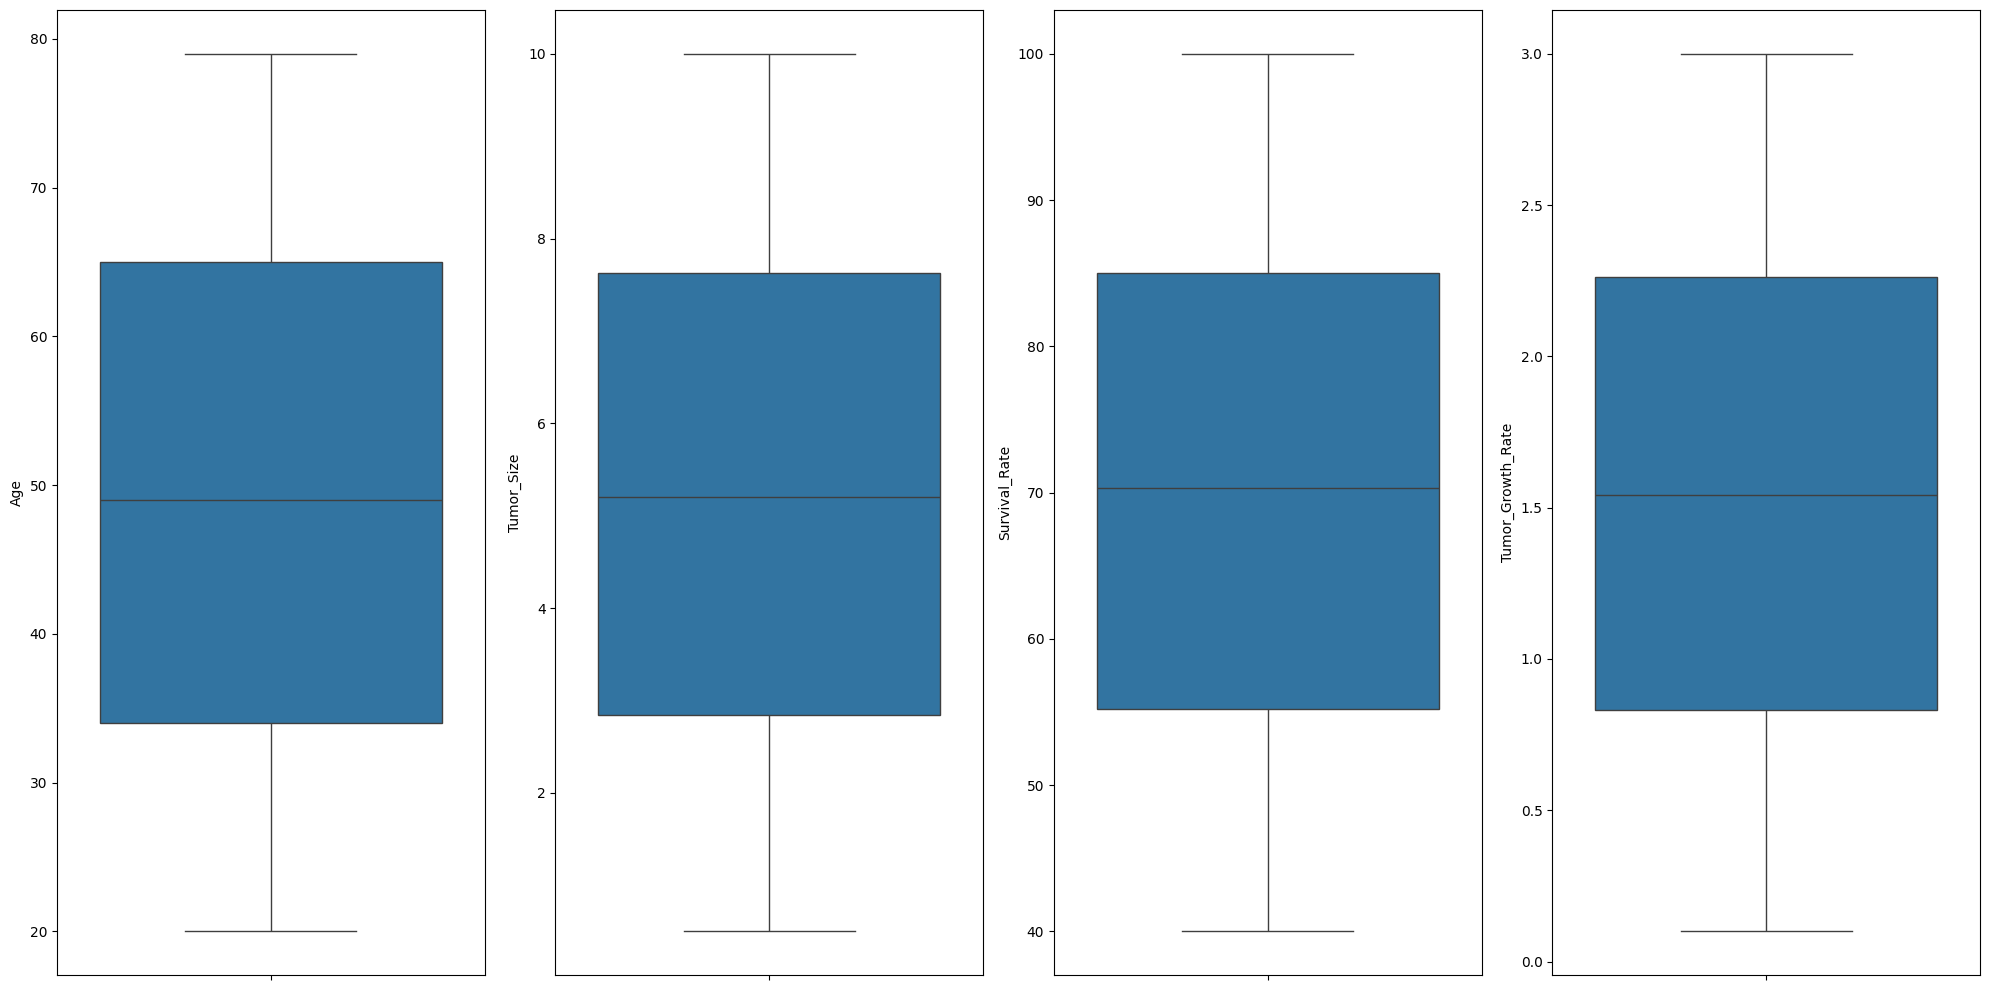

In [19]:
import seaborn as sns
fig=plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax=fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [69]:
from sklearn.preprocessing import QuantileTransformer
qs = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='uniform')
df[cont]=qs.fit_transform(df[cont])

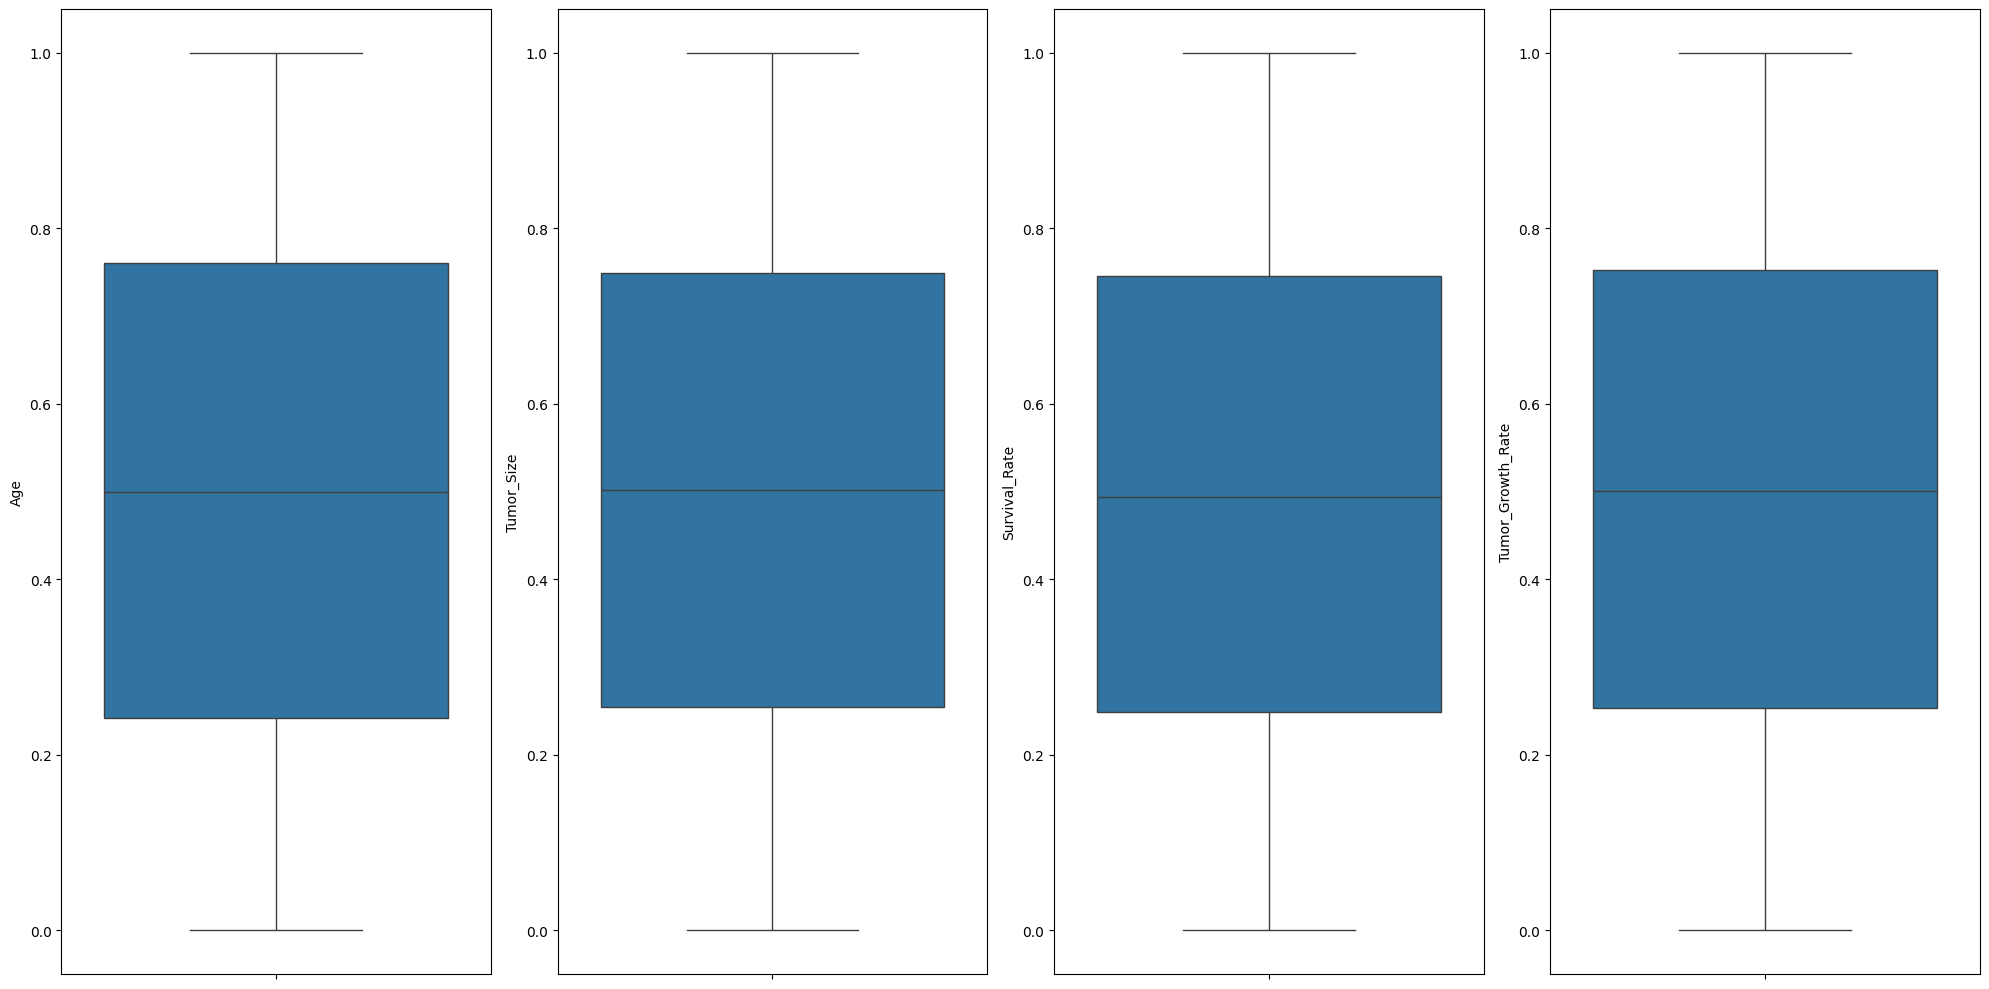

In [70]:
import seaborn as sns
fig=plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax=fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [71]:
df.head()

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Female,Gender_Male,Gender_nan,Tumor_Type_Benign,Tumor_Type_Malignant,Tumor_Type_nan,...,Surgery_Performed_nan,Chemotherapy_No,Chemotherapy_Yes,Chemotherapy_nan,Family_History_No,Family_History_Yes,Family_History_nan,MRI_Result_Negative,MRI_Result_Positive,MRI_Result_nan
0,0.888889,0.520457,0.188717,0.071318,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
1,0.111111,0.462490,0.110102,0.717919,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
2,0.195066,0.543849,0.116996,0.621413,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
3,0.164957,0.109132,0.196534,0.408487,False,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
4,0.586443,0.210852,0.239709,0.685641,True,False,False,True,False,False,...,False,False,True,False,True,False,False,False,True,False


# Датасеты, загрузка, модель

In [72]:
X=np.array(df.values, dtype=np.float32)
y=target.values

In [73]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0,1]), y=y)
class_weights = np.array([x for x in class_weights], dtype=np.float32)
class_weights

array([1.010203  , 0.99000096], dtype=float32)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_dum, y_train, y_dum=train_test_split(X,y, test_size=0.2, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_dum, y_dum ,test_size=0.5, stratify=y_dum)

In [75]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [76]:
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
      self.data = torch.Tensor(data)
      self.targets = torch.LongTensor(targets)
      self.transform = transform

  def __getitem__(self, index):
      x = self.data[index]
      y = self.targets[index]
      return x, y

  def get_labels(self): # исключительно для ImbalancedDatasetSampler, иначе прописовать не надо
    return self.targets

  def __len__(self):
      return len(self.data)

In [77]:
train_dataset=MyDataset(X_train,y_train)
val_dataset=MyDataset(X_val,y_val)
test_dataset=MyDataset(X_test,y_test)

In [78]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 2000
Длина валидационной выборки: 2000
Длина тренировочной выборки: 16000


In [79]:
import torchvision
from typing import Callable
class ImbalancedDatasetSampler(torch.utils.data.sampler.Sampler):

    """Samples elements randomly from a given list of indices for imbalanced dataset

    Arguments:
        indices: a list of indices
        num_samples: number of samples to draw
        callback_get_label: a callback-like function which takes two arguments - dataset and index
    Author: ufoym
    """

    def __init__(
        self,
        dataset,
        labels: list = None,
        indices: list = None,
        num_samples: int = None,
        callback_get_label: Callable = None,
    ):
        # if indices is not provided, all elements in the dataset will be considered
        self.indices = list(range(len(dataset))) if indices is None else indices

        # define custom callback
        self.callback_get_label = callback_get_label

        # if num_samples is not provided, draw `len(indices)` samples in each iteration
        self.num_samples = len(self.indices) if num_samples is None else num_samples

        # distribution of classes in the dataset
        df = pd.DataFrame()
        df["label"] = self._get_labels(dataset) if labels is None else labels
        df.index = self.indices
        df = df.sort_index()

        label_to_count = df["label"].value_counts()

        weights = 1.0 / label_to_count[df["label"]]

        self.weights = torch.DoubleTensor(weights.to_list())

    def _get_labels(self, dataset):
        if self.callback_get_label:
            return self.callback_get_label(dataset)
        elif isinstance(dataset, torch.utils.data.TensorDataset):
            return dataset.tensors[1]
        elif isinstance(dataset, torchvision.datasets.MNIST):
            return dataset.train_labels.tolist()
        elif isinstance(dataset, torchvision.datasets.ImageFolder):
            return [x[1] for x in dataset.imgs]
        elif isinstance(dataset, torchvision.datasets.DatasetFolder):
            return dataset.samples[:][1]
        elif isinstance(dataset, torch.utils.data.Subset):
            return dataset.dataset.imgs[:][1]
        elif isinstance(dataset, torch.utils.data.Dataset):
            return dataset.get_labels()
        else:
            raise NotImplementedError

    def __iter__(self):
        return (self.indices[i] for i in torch.multinomial(self.weights, self.num_samples, replacement=True))

    def __len__(self):
        return self.num_samples

In [80]:
batch_size=64 # размер пакета
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=False,
                          sampler=ImbalancedDatasetSampler(train_dataset))
# у train пакеты формируются по броску подкрученной монетки, у test и val по равномерной
val_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [81]:
class Classification_Model_FFNN(nn.Module):
  def __init__(self, num_inputs, num_classes):
      super(Classification_Model_FFNN, self).__init__()
      self.pipe = nn.Sequential(
          nn.Linear(num_inputs, 64, bias=False),
          nn.LeakyReLU(inplace=True),
          nn.BatchNorm1d(64),
          nn.Dropout(0.3),  # Dropout 1

          nn.Linear(64, 32, bias=False),
          nn.LeakyReLU(inplace=True),
          nn.BatchNorm1d(32),
          nn.Dropout(0.3),  # Dropout 2

          nn.Linear(32, num_classes)
)


  def forward(self, x):
      return self.pipe(x)

In [82]:
num_inputs=len(df.columns)
num_inputs

55

In [83]:
num_classes=len(target.unique())
num_classes

2

In [84]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

In [85]:
model=Classification_Model_FFNN(num_inputs,num_classes)
model.to(device);

In [86]:
! pip install torchinfo --quiet

In [87]:
from torchinfo import summary
summary(model,input_size=(1, num_inputs))

Layer (type:depth-idx)                   Output Shape              Param #
Classification_Model_FFNN                [1, 2]                    --
├─Sequential: 1-1                        [1, 2]                    --
│    └─Linear: 2-1                       [1, 64]                   3,520
│    └─LeakyReLU: 2-2                    [1, 64]                   --
│    └─BatchNorm1d: 2-3                  [1, 64]                   128
│    └─Dropout: 2-4                      [1, 64]                   --
│    └─Linear: 2-5                       [1, 32]                   2,048
│    └─LeakyReLU: 2-6                    [1, 32]                   --
│    └─BatchNorm1d: 2-7                  [1, 32]                   64
│    └─Dropout: 2-8                      [1, 32]                   --
│    └─Linear: 2-9                       [1, 2]                    66
Total params: 5,826
Trainable params: 5,826
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward p

#Цикл обучения

In [88]:
weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

In [89]:
from tqdm import tqdm

In [90]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=1)
    return torch.mean((classes == labels).float())

In [91]:
train_losses=[]
train_accs=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss= 0.
  running_acc = 0.
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()
      running_acc += accuracy(outputs,targets)

  train_loss=running_loss/len(train_loader)
  train_acc=running_acc/len(train_loader)

  train_losses.append(train_loss)
  train_accs.append(train_acc)
  print('Средняя ошибка модели на тренировочной выборке: %.4f'%(train_loss)+'   Средняя точность модели на тренировочной выборке: %.4f'%(train_acc))

In [92]:
val_losses=[]
val_accs=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss = 0.
    running_acc = 0.
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)

            running_loss += loss.item()
            running_acc += accuracy(outputs,targets)

        val_loss=running_loss/len(val_loader)
        val_acc=running_acc/len(val_loader)

        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print('Средняя ошибка модели на валидационной выборке: %.4f'%(val_loss)+'   Средняя точность модели на валидационной выборке: %.4f'%(val_acc))

In [93]:
class EarlyStopperByAccuracy:
    def __init__(self, patience=10, min_delta=0.005):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_acc = 0

    def early_stop(self, current_acc):
        if current_acc > self.best_acc + self.min_delta:
            self.best_acc = current_acc
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False


In [94]:
max_epochs=100
best_acc=0.0
early_stopper = EarlyStopperByAccuracy(patience=10, min_delta=0.005)
for epoch in range(1, max_epochs+1):
    train(model, epoch)
    val(model, epoch)

    if val_accs[-1] > best_acc:
        torch.save(model, 'best-model.pt')
        best_acc = val_accs[-1]

    if early_stopper.early_stop(val_accs[-1]):
        print("Остановка по точности")
        break


Epoch : 1


100%|██████████| 250/250 [00:00<00:00, 393.26it/s]


Средняя ошибка модели на тренировочной выборке: 0.8005   Средняя точность модели на тренировочной выборке: 0.4995

Epoch : 1


100%|██████████| 32/32 [00:00<00:00, 1032.39it/s]


Средняя ошибка модели на валидационной выборке: 0.7403   Средняя точность модели на валидационной выборке: 0.5083

Epoch : 2


100%|██████████| 250/250 [00:00<00:00, 525.32it/s]


Средняя ошибка модели на тренировочной выборке: 0.7960   Средняя точность модели на тренировочной выборке: 0.4961

Epoch : 2


100%|██████████| 32/32 [00:00<00:00, 948.19it/s]


Средняя ошибка модели на валидационной выборке: 0.7431   Средняя точность модели на валидационной выборке: 0.5117

Epoch : 3


100%|██████████| 250/250 [00:00<00:00, 413.64it/s]


Средняя ошибка модели на тренировочной выборке: 0.7974   Средняя точность модели на тренировочной выборке: 0.4983

Epoch : 3


100%|██████████| 32/32 [00:00<00:00, 985.84it/s]


Средняя ошибка модели на валидационной выборке: 0.7453   Средняя точность модели на валидационной выборке: 0.5098

Epoch : 4


100%|██████████| 250/250 [00:00<00:00, 412.44it/s]


Средняя ошибка модели на тренировочной выборке: 0.7979   Средняя точность модели на тренировочной выборке: 0.4996

Epoch : 4


100%|██████████| 32/32 [00:00<00:00, 1136.70it/s]


Средняя ошибка модели на валидационной выборке: 0.7415   Средняя точность модели на валидационной выборке: 0.5107

Epoch : 5


100%|██████████| 250/250 [00:00<00:00, 526.39it/s]


Средняя ошибка модели на тренировочной выборке: 0.7873   Средняя точность модели на тренировочной выборке: 0.5020

Epoch : 5


100%|██████████| 32/32 [00:00<00:00, 1086.89it/s]


Средняя ошибка модели на валидационной выборке: 0.7427   Средняя точность модели на валидационной выборке: 0.5098

Epoch : 6


100%|██████████| 250/250 [00:00<00:00, 281.27it/s]


Средняя ошибка модели на тренировочной выборке: 0.7948   Средняя точность модели на тренировочной выборке: 0.5010

Epoch : 6


100%|██████████| 32/32 [00:00<00:00, 674.93it/s]


Средняя ошибка модели на валидационной выборке: 0.7445   Средняя точность модели на валидационной выборке: 0.5107

Epoch : 7


100%|██████████| 250/250 [00:01<00:00, 219.49it/s]


Средняя ошибка модели на тренировочной выборке: 0.7949   Средняя точность модели на тренировочной выборке: 0.5009

Epoch : 7


100%|██████████| 32/32 [00:00<00:00, 723.55it/s]


Средняя ошибка модели на валидационной выборке: 0.7386   Средняя точность модели на валидационной выборке: 0.5181

Epoch : 8


100%|██████████| 250/250 [00:01<00:00, 206.23it/s]


Средняя ошибка модели на тренировочной выборке: 0.7943   Средняя точность модели на тренировочной выборке: 0.4969

Epoch : 8


100%|██████████| 32/32 [00:00<00:00, 220.20it/s]


Средняя ошибка модели на валидационной выборке: 0.7452   Средняя точность модели на валидационной выборке: 0.5083

Epoch : 9


100%|██████████| 250/250 [00:01<00:00, 128.22it/s]


Средняя ошибка модели на тренировочной выборке: 0.7949   Средняя точность модели на тренировочной выборке: 0.5069

Epoch : 9


100%|██████████| 32/32 [00:00<00:00, 283.81it/s]


Средняя ошибка модели на валидационной выборке: 0.7467   Средняя точность модели на валидационной выборке: 0.5132

Epoch : 10


100%|██████████| 250/250 [00:02<00:00, 103.86it/s]


Средняя ошибка модели на тренировочной выборке: 0.7914   Средняя точность модели на тренировочной выборке: 0.5042

Epoch : 10


100%|██████████| 32/32 [00:00<00:00, 573.45it/s]


Средняя ошибка модели на валидационной выборке: 0.7417   Средняя точность модели на валидационной выборке: 0.5112

Epoch : 11


100%|██████████| 250/250 [00:01<00:00, 191.11it/s]


Средняя ошибка модели на тренировочной выборке: 0.7920   Средняя точность модели на тренировочной выборке: 0.5017

Epoch : 11


100%|██████████| 32/32 [00:00<00:00, 571.76it/s]


Средняя ошибка модели на валидационной выборке: 0.7455   Средняя точность модели на валидационной выборке: 0.5093

Epoch : 12


100%|██████████| 250/250 [00:01<00:00, 225.17it/s]


Средняя ошибка модели на тренировочной выборке: 0.7919   Средняя точность модели на тренировочной выборке: 0.5046

Epoch : 12


100%|██████████| 32/32 [00:00<00:00, 461.85it/s]


Средняя ошибка модели на валидационной выборке: 0.7413   Средняя точность модели на валидационной выборке: 0.5137

Epoch : 13


100%|██████████| 250/250 [00:01<00:00, 161.44it/s]


Средняя ошибка модели на тренировочной выборке: 0.7994   Средняя точность модели на тренировочной выборке: 0.4971

Epoch : 13


100%|██████████| 32/32 [00:00<00:00, 624.73it/s]


Средняя ошибка модели на валидационной выборке: 0.7405   Средняя точность модели на валидационной выборке: 0.5195

Epoch : 14


100%|██████████| 250/250 [00:00<00:00, 279.89it/s]


Средняя ошибка модели на тренировочной выборке: 0.7954   Средняя точность модели на тренировочной выборке: 0.5044

Epoch : 14


100%|██████████| 32/32 [00:00<00:00, 344.85it/s]


Средняя ошибка модели на валидационной выборке: 0.7445   Средняя точность модели на валидационной выборке: 0.5073

Epoch : 15


100%|██████████| 250/250 [00:00<00:00, 255.25it/s]


Средняя ошибка модели на тренировочной выборке: 0.7898   Средняя точность модели на тренировочной выборке: 0.5029

Epoch : 15


100%|██████████| 32/32 [00:00<00:00, 630.23it/s]


Средняя ошибка модели на валидационной выборке: 0.7413   Средняя точность модели на валидационной выборке: 0.5107

Epoch : 16


100%|██████████| 250/250 [00:01<00:00, 201.11it/s]


Средняя ошибка модели на тренировочной выборке: 0.7949   Средняя точность модели на тренировочной выборке: 0.4967

Epoch : 16


100%|██████████| 32/32 [00:00<00:00, 685.36it/s]


Средняя ошибка модели на валидационной выборке: 0.7444   Средняя точность модели на валидационной выборке: 0.5107

Epoch : 17


100%|██████████| 250/250 [00:01<00:00, 141.57it/s]


Средняя ошибка модели на тренировочной выборке: 0.7951   Средняя точность модели на тренировочной выборке: 0.4963

Epoch : 17


100%|██████████| 32/32 [00:00<00:00, 225.73it/s]

Средняя ошибка модели на валидационной выборке: 0.7417   Средняя точность модели на валидационной выборке: 0.5117
Остановка по точности


#Анализ результатов и тестирование

In [95]:
best_acc

tensor(0.5195)

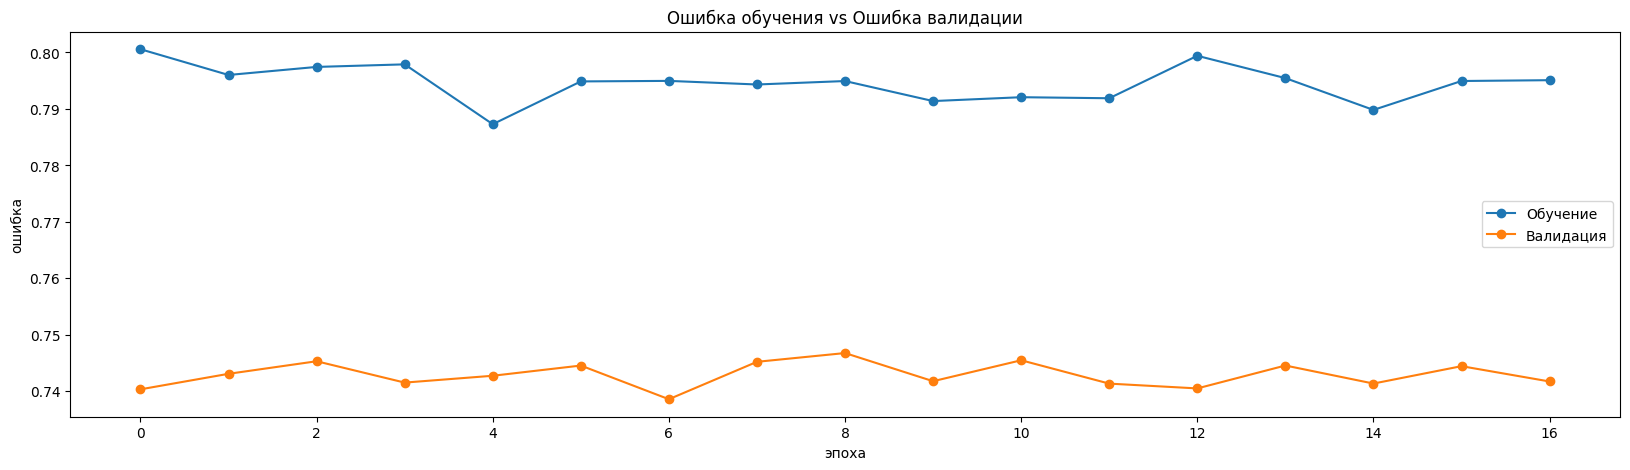

In [96]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

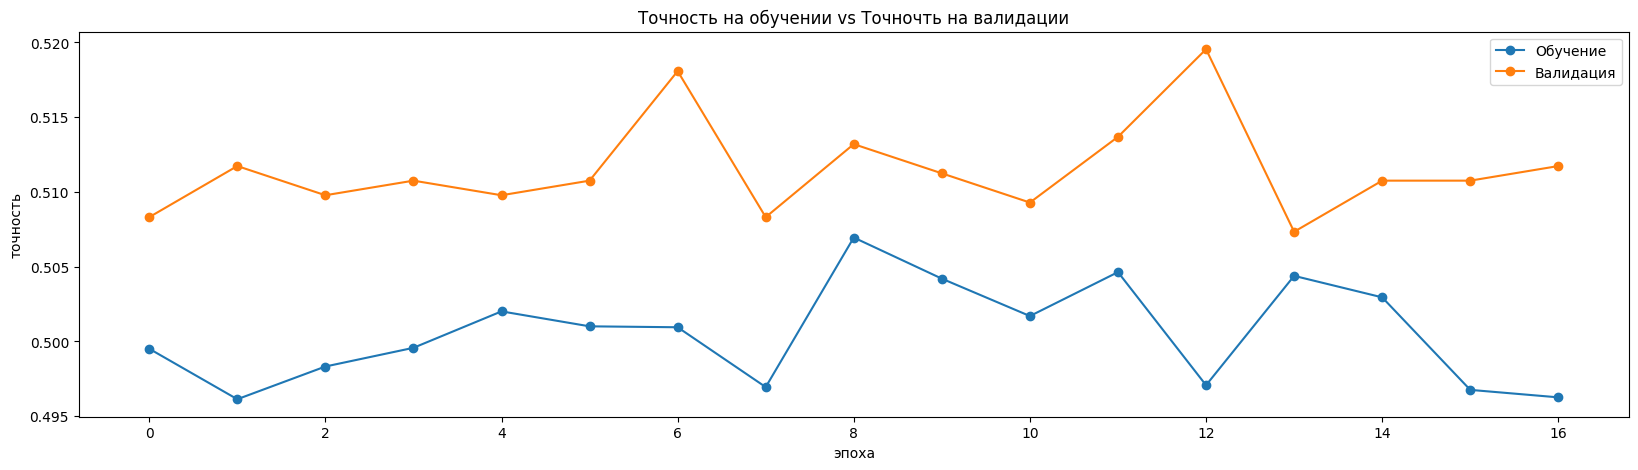

In [97]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_accs,'-o')
plt.plot(val_accs,'-o')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend(['Обучение','Валидация'])
plt.title('Точность на обучении vs Точночть на валидации')
plt.show()

In [98]:
model = torch.load('best-model.pt');
model.eval();

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL __main__.Classification_Model_FFNN was not an allowed global by default. Please use `torch.serialization.add_safe_globals([Classification_Model_FFNN])` or the `torch.serialization.safe_globals([Classification_Model_FFNN])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [99]:
preds=[]
trgts=[]
with torch.no_grad():
  for data in tqdm(test_loader):
    inputs, targets=data[0].to(device),data[1].to(device)
    outputs=model(inputs)
    targets=targets.to('cpu').numpy()
    pred = outputs.data.max(1, keepdim=True)[1]
    pred = pred.to('cpu').numpy()
    trgts.append(targets)
    preds.append(pred)

100%|██████████| 32/32 [00:00<00:00, 753.49it/s]


In [100]:
targets=[x for sub in trgts for x in sub]
predictions=[x[0] for sub in preds for x in sub]
targets=np.array(targets)
predictions=np.array(predictions)

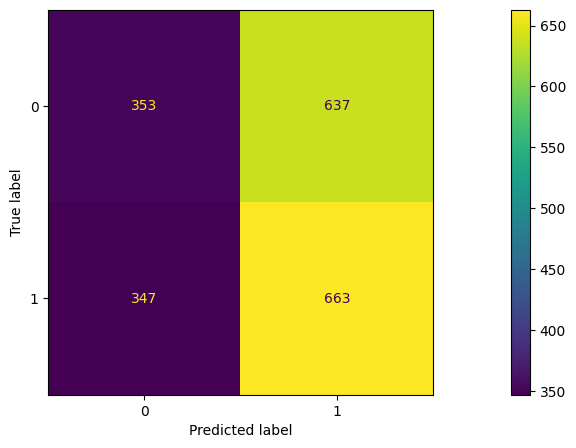

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(targets, predictions)
ConfusionMatrixDisplay(cm).plot()

In [102]:
print(classification_report(targets, predictions))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42       990
           1       0.51      0.66      0.57      1010

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000



In [103]:
print(np.bincount(y_train))
print(np.bincount(y_val))


[7919 8081]
[ 990 1010]


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train, y_train)

# Предсказания
y_pred = clf.predict(X_val)

# Оценка
print("Точность на валидации:", clf.score(X_val, y_val))
print(classification_report(y_val, y_pred))


Точность на валидации: 0.527
              precision    recall  f1-score   support

           0       0.52      0.51      0.52       990
           1       0.53      0.54      0.54      1010

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



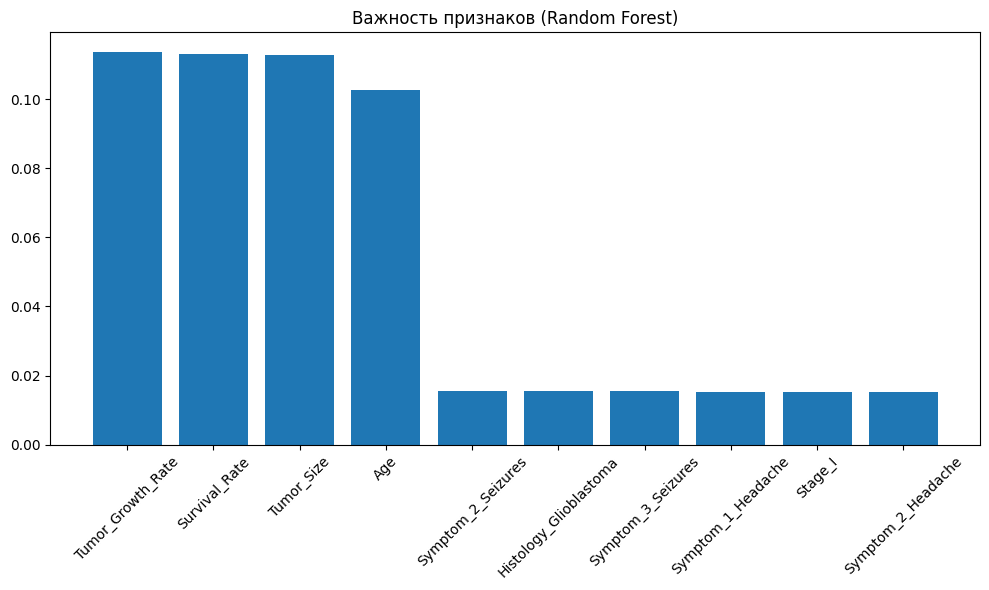

In [105]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.columns

plt.figure(figsize=(10, 6))
plt.title("Важность признаков (Random Forest)")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()


In [106]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
print("Точность на валидации:", xgb.score(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:50:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Точность на валидации: 0.499


In [107]:
top_features = ['Tumor_Growth_Rate', 'Survival_Rate', 'Tumor_Size', 'Age']
X_train_reduced = pd.DataFrame(X_train, columns=df.columns)[top_features].values
X_val_reduced = pd.DataFrame(X_val, columns=df.columns)[top_features].values

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_reduced, y_train)
print("Точность на валидации (логрег):", logreg.score(X_val_reduced, y_val))


Точность на валидации (логрег): 0.503


В ходе проекта были протестированы различные модели машинного обучения (нейросеть, случайный лес, XGBoost, логистическая регрессия) для предсказания необходимости дальнейшего наблюдения у пациентов с опухолью мозга. После полноценной предобработки данных и анализа признаков стало ясно, что даже самые важные признаки (скорость роста опухоли, выживаемость, размер опухоли, возраст) дают модели точность около 50–53%, что соответствует случайному угадыванию. Это говорит о слабой зависимости между признаками и целевой переменной или о том, что сама метка могла быть сформирована не только на основе медицинских данных. Несмотря на это, работа позволила глубоко изучить этапы построения модели, обработки данных и анализа важности признаков.